In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
(df.isnull().mean())*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [8]:
col = [var for var in df.columns if df[var].isnull().mean()< 0.05 and df[var].isnull().mean()> 0]
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [9]:
df[col].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
979,0.893,no_enrollment,Graduate,13.0,50.0
3981,0.910,no_enrollment,Graduate,5.0,44.0
2383,0.624,no_enrollment,Graduate,14.0,94.0
7541,0.920,no_enrollment,Graduate,19.0,9.0
12142,0.920,no_enrollment,Masters,19.0,24.0


In [10]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [11]:
# since not a lot of data is getting lost this will be our new  df
new_df = df[col].dropna()
df.shape, new_df.shape


((19158, 13), (17182, 5))

<Axes: >

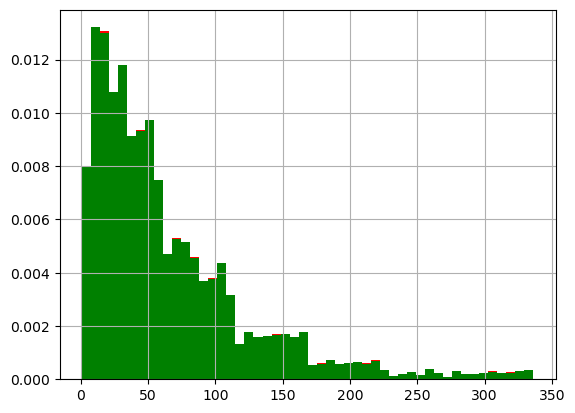

In [17]:

ax = plt.subplot(111)

df['training_hours'].hist(color= 'red', bins= 50, ax=ax, density = True)

new_df['training_hours'].hist(color= 'green', bins= 50, ax=ax, density = True)


<Axes: >

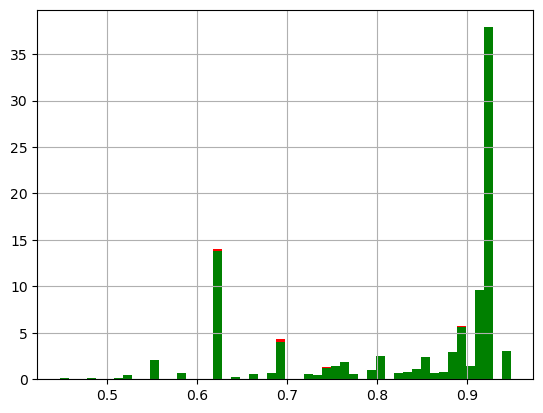

In [19]:
# it is good that new df is quite similar to the initial one which confirms that the data was MCAR(missing completelt at random)
# this analysis must be done after applying CCA (complete case analysis)

ax = plt.subplot(111)

df['city_development_index'].hist(color= 'red', bins= 50, ax=ax, density = True)

new_df['city_development_index'].hist(color= 'green', bins= 50, ax=ax, density = True)


<Axes: >

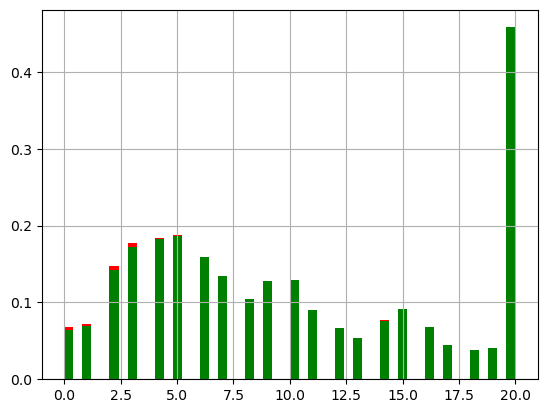

In [21]:
ax = plt.subplot(111)

df['experience'].hist(color= 'red', bins= 50, ax=ax, density = True)

new_df['experience'].hist(color= 'green', bins= 50, ax=ax, density = True)


In [22]:
# now we are also checking the ratio:

temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['enrolled_university'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [23]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
